## ARM and Networking.




### Introduction

#### About the data
The data displays the annual emissions of harmful components to the environment through crop residue and waste food disposal. It consists of Damain and Item, with Items denoting the type of residue or food disposal. The goal of association rule mining on this data is to find patterns, correlations, or associations that occur frequently in the dataset. The purpose is to determine the correlation between the variables in the dataset and to identify the emission or item that produced the emission, as well as the domain to which it belongs. In this scenario, ARM makes it easy to gain insight into the whole connection between the variables in the dataset and aids in the goal of forecasting the emission or its source.

#### About Association Rule Mining
Association rule learning is a machine learning method that uses rules to discover interesting relationships between variables in huge databases. Its goal is to detect strong rules identified in databases using some interestingness criteria. Association rules are intended to find the rules that determine how or why particular items are associated in any given transaction involving a range of goods.

### ARM using Apriori Algorithm.
- Apriori is one of the statistical algorithms that have been developed to implement association rule mining. There are three major components of Apriori algorithm:<br>

    - Support 
    - Confidence
    - Lift

- Support: Support refers to an item's default popularity and can be calculated by dividing the number of transactions containing a specific item by the total number of transactions. 

- Confidence: If item A is purchased, confidence refers to the possibility that item B will be purchased as well. It can be computed by dividing the number of transactions in which A and B are purchased together by the total number of transactions in which A is purchased.

- Lift: Lift, basically tells us the association between the products. Lift of 1 means there is no association between products A and B.

Apriori Algorithm tries to extract all rules associated from each possible combination. Apriori does it with following steps:<br>
- Set a minimum value for support and confidence. This indicates that we are only interested in identifying rules for items that have a specific default existence and a minimum value for co-occurrence with other items<br>
- Extract all the subsets having higher value of support than minimum threshold.<br>
- Select all the rules from the subsets with confidence value higher than minimum threshold.<br>
- Order the rules by descending order of Lift.

### Importing Required Libraries

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
import networkx as nx 
import warnings
warnings.filterwarnings('ignore')

### Read the data

In [172]:
df = pd.read_csv('../../data/food_crop_data.csv')
df.head()

,Domain,Area,Element,Item,Year,Value
0,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1990,10.629803
1,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1991,10.934600
2,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1992,11.138956
3,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1993,11.335046
4,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1994,11.754348


In [173]:
for i in range(len(df)):
    
    for col in df.columns:
        
        df[col][i] = col + '_' + str(df[col][i])

### Apriori in python

For Apriori algorithm we need our data to be in the form of a list, To convert our data set into a list we use the folllowing code.

In [174]:
records = []
for i in range(len(df)):
    records.append([str(df.values[i,j]) for j in range(0, 5)])


The Apriori algorithm is then applied to the dataset. To accomplish this, we can use the apriori class from the apyori package that we loaded.
Some argument values are required for the apriori class to work. The first parameter is a list of lists from which you want to extract rules. The min support parameter is the second one. This parameter is used to select items with support values greater than the parameter's value. Following that, the min confidence parameter filters out rules with confidence larger than the parameter's set confidence threshold. Similarly, the min lift argument defines the minimal lift value for the rules that have been shortlisted. Finally, the min length argument sets the minimum amount of items you want in the collection.

In [177]:
association_rules = apriori(records, min_support=0.01, min_confidence=0.1, min_lift=2, min_length=2)
association_results = list(association_rules)

Outputting the rules.

In [178]:
for item in association_results:
    
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    
    #second index of the inner list
    print("Support: " + str(item[1]))
    
    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Domain_Food systems waste disposal -> Element_Emissions (CO2)
Support: 0.03542857142857143
Confidence: 0.2
Lift: 5.645161290322581
Rule: Domain_Food systems waste disposal -> Item_Domestic wastewater
Support: 0.03542857142857143
Confidence: 0.2
Lift: 5.645161290322581
Rule: Domain_Food systems waste disposal -> Item_Incineration
Support: 0.03542857142857143
Confidence: 0.2
Lift: 5.645161290322581
Rule: Domain_Food systems waste disposal -> Item_Industrial wastewater
Support: 0.07085714285714285
Confidence: 0.4
Lift: 5.645161290322581
Rule: Domain_Food systems waste disposal -> Item_Solid food waste
Support: 0.03542857142857143
Confidence: 0.2
Lift: 5.645161290322581
Rule: Element_Emissions (CH4) -> Item_Solid food waste
Support: 0.03542857142857143
Confidence: 0.10264900662251655
Lift: 2.8973509933774833
Rule: Item_Incineration -> Element_Emissions (CO2)
Support: 0.03542857142857143
Confidence: 1.0
Lift: 28.225806451612904
Rule: Element_Emissions (N2O) -> Item_Domestic wastewater

In [179]:
def reformat_results(results):

    #CLEAN-UP RESULTS 
    keep=[]
    for i in range(0,len(results)):
        for j in range(0,len(list(results[i]))):
            # print(results)
            if(j>1):
                for k in range(0,len(list(results[i][j]))):
                    if(len(results[i][j][k][0])!=0):
                        #print(len(results[i][j][k][0]),results[i][j][k][0])
                        rhs=list(results[i][j][k][0])
                        lhs=list(results[i][j][k][1])
                        conf=float(results[i][j][k][2])
                        lift=float(results[i][j][k][3])
                        keep.append([rhs,lhs,supp,conf,supp*conf,lift])
                        # keep.append()
            if(j==1):
                supp=results[i][j]

    return pd.DataFrame(keep, columns =["rhs","lhs","supp","conf","supp x conf","lift"])

### Networkx Graph:

By definition Graph is a collection of nodes connected by edges. In NetworkX, nodes can be any hashable object, A graph can be grown by addig nodes to the graph and adding edges to them. Can be added one at a time or can be iterated to add them together. We can examine edges and nodes using G.edges and G.nodes where G is the graph. Here we are trying to form a network of association rules obtained earlier. Our nodes will be the association rules and our graph represents the relation between them.

In [180]:
def convert_to_network(df):
    #print(df)

    #BUILD GRAPH
    G = nx.DiGraph()  # DIRECTED
    for row in df.iterrows():
        # for column in df.columns:
        lhs="_".join(row[1][0])
        rhs="_".join(row[1][1])
        conf=row[1][3]; #print(conf)
        if(lhs not in G.nodes): 
            G.add_node(lhs)
        if(rhs not in G.nodes): 
            G.add_node(rhs)

        edge=(lhs,rhs)
        if edge not in G.edges:
            G.add_edge(lhs, rhs, weight=conf)

    # print(G.nodes)
    # print(G.edges)
    return G

In [184]:
def plot_network(G):
    #SPECIFIY X-Y POSITIONS FOR PLOTTING
    pos=nx.random_layout(G)

    #GENERATE PLOT
    fig, ax = plt.subplots()
    fig.set_size_inches(45, 45)

    #assign colors based on attributes
    weights_e 	= [G[u][v]['weight'] for u,v in G.edges()]

    #SAMPLE CMAP FOR COLORS 
    cmap=plt.cm.get_cmap('Blues')
    colors_e 	= [cmap(G[u][v]['weight']*10) for u,v in G.edges()]

    #PLOT
    nx.draw(
    G,
    node_color='crimson',
    edgecolors="black",
    edge_color=colors_e,
    node_size=7000,
    linewidths=2,
    font_size=12,
    font_color="black",
    width=weights_e,
    with_labels=True,
    pos=pos,
    ax=ax
    )
    ax.set_title("NetworkX Graph for Association Rules", fontsize=50)
    
    plt.show()


In [185]:
result_df = reformat_results(association_results)
print("Results\n",len(association_results))

Results
 26


A network is plotted to understand the association and relation between the variables.

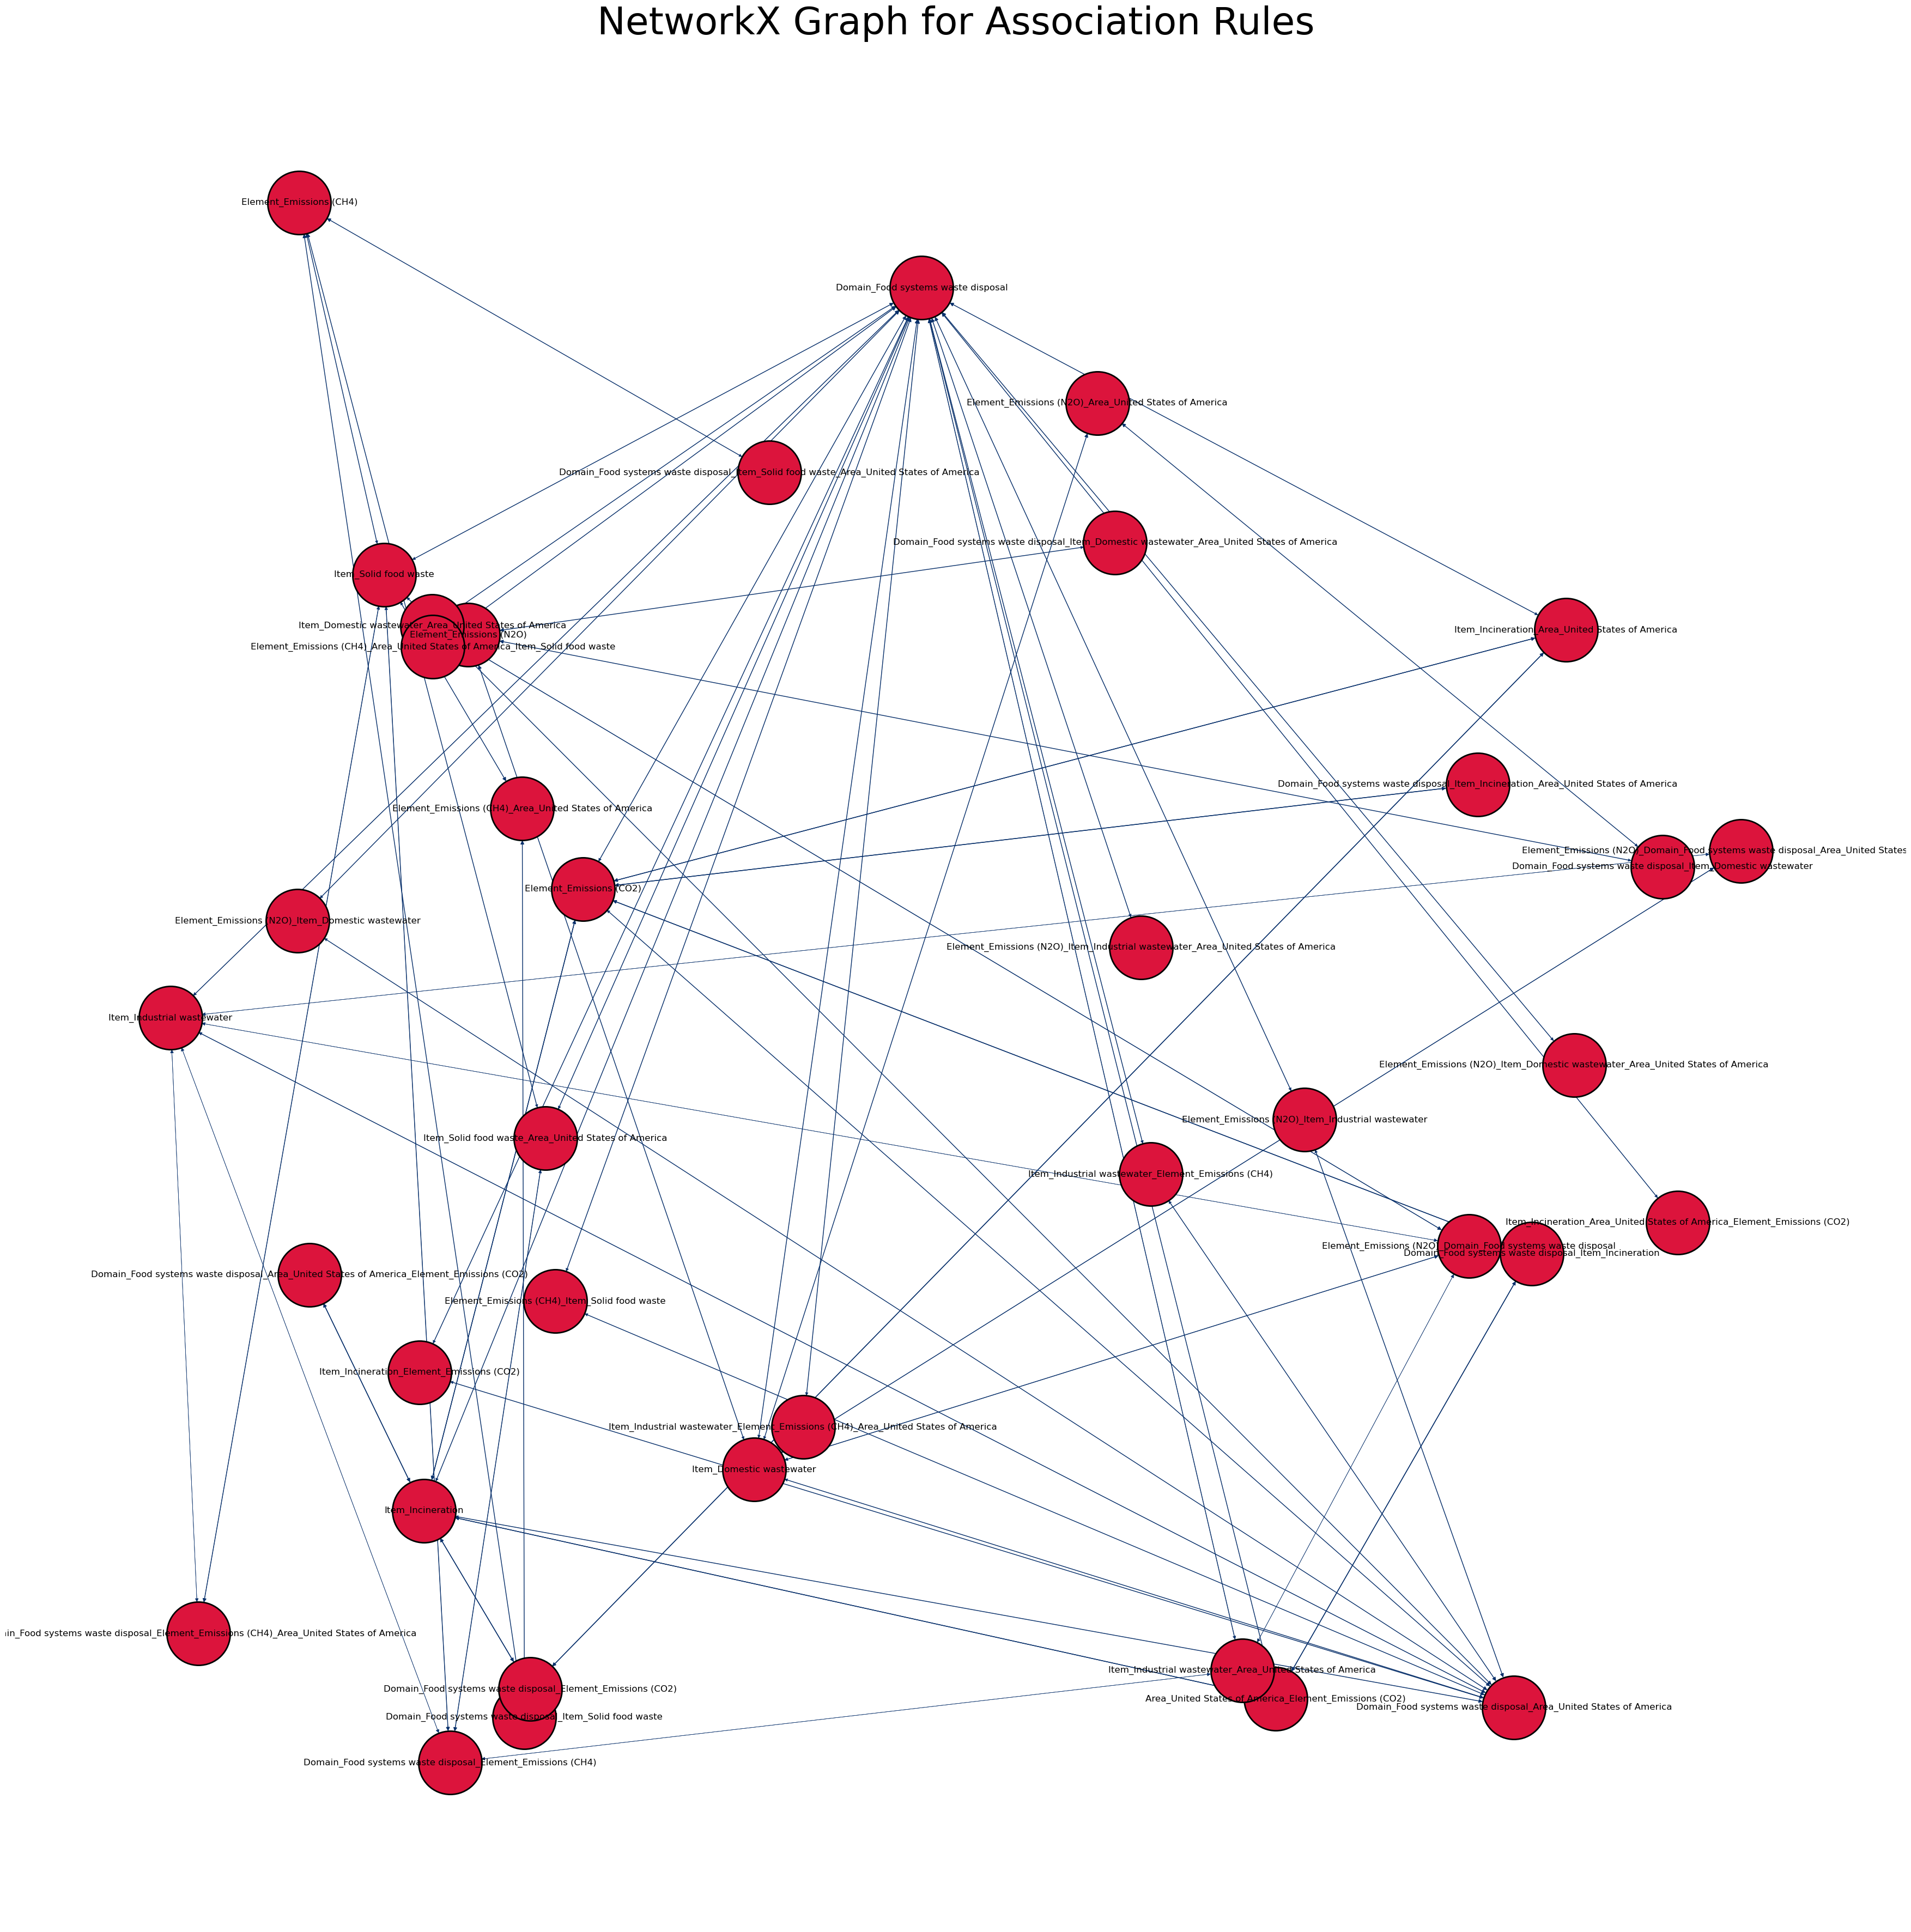

In [186]:
G = convert_to_network(result_df)
plot_network(G)

### Conclusion
Association rule mining algorithms such as Apriori are very useful for finding simple associations between our data items. The goal was to find the association rules between the variables of data set, a lot of interesting asoociations were found after applying apriori to the data set. For example, <br>
- if the Domain is food system disposal, then the emission is most likel Carbon dioxide.<br>
- If the Domain is food system disposal is associated with idustrial water as they have the common emission.<br>
- If the item is inceneration then it is most likely to be solid food disposal so on..<br>
The model gives insight on how each variable is linked and how these relations can be used for better understanding and analysis.<br>
